<a href="https://colab.research.google.com/github/rajlaxmi-21/Pytorch/blob/main/DatasetandDatasetLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch

-> torch.utils.data.DataLoader - iterator for dataset

-> torch.utils.data.Dataset - stores samples + labels

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform= ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform= ToTensor()
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.65MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 55.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.02MB/s]


In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

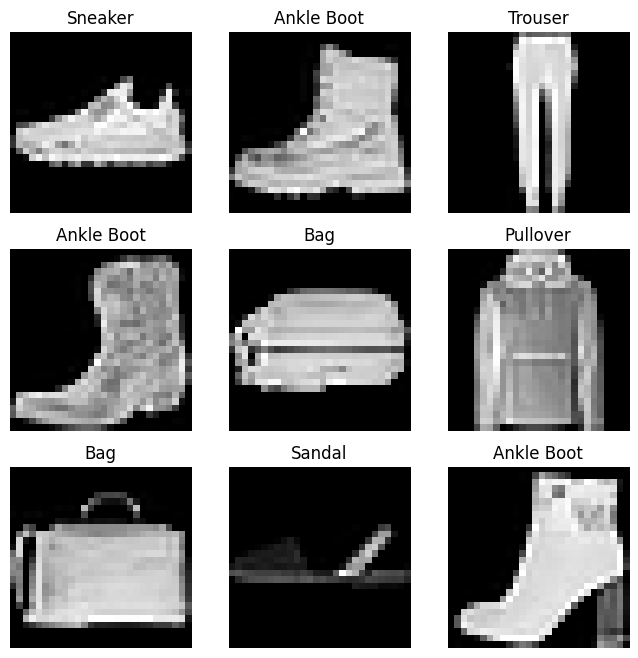

In [9]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range (1, cols*rows+1):
  sample_ind = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_ind]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='grey')

plt.show()

Custom Dataset must implement

-> __init__

-> __len__

-> __getitem__



```
# import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
```



##Dataloaders

In [11]:
from torch.utils.data import DataLoader

In [12]:
train_dataloder = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloder = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


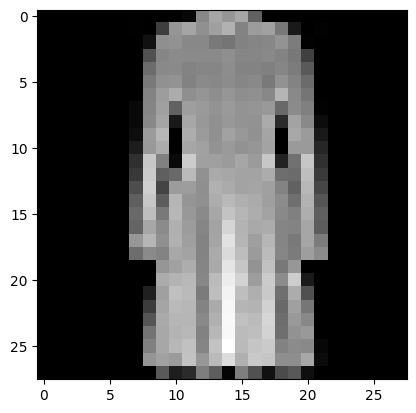

Label: Dress


In [19]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloder))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")